In [59]:
import numpy as np
import pandas as pd
import matplotlib as mp
import statsmodels.api as sm

In [60]:
mu, sigma = 0, 5 # mean and standard deviation of normal distribution for the error term
x = np.random.uniform(40,80,100)
epsilon = np.random.normal(mu,sigma,100)
y = 3 + 4*x + epsilon

In [61]:
print(x)

[77.6182574  40.26473892 60.41156027 76.69460184 64.46423867 65.59307309
 53.60729772 49.94322217 60.73884488 60.51974282 63.27082698 75.29788043
 59.08817477 75.97734943 56.6335725  42.49674057 50.97742545 54.30801781
 72.60331686 71.66392777 51.72186497 77.97452999 50.48125854 55.66993059
 76.84655156 71.51678429 73.84367648 59.34893694 45.77584556 69.8452485
 78.79410553 46.90244009 61.54017854 57.24288079 67.67614476 78.24530063
 75.52020191 62.57735223 77.82970796 74.95348243 53.67366481 65.53964865
 46.98602778 58.3503199  77.24335285 46.69065535 51.3594411  62.18125826
 74.69473322 71.20794623 56.12395008 67.59117635 40.92473412 40.73824255
 77.76235891 77.61596942 45.51723699 73.5334613  69.1760267  44.53797651
 72.39369246 61.68213272 74.28418247 41.85528517 72.31586232 61.49723449
 62.65629567 62.21204812 41.12647586 55.61427816 43.30066932 43.07281819
 56.76620474 67.08922416 43.99677969 51.71720945 56.98694241 79.2365934
 51.54657369 77.4255672  43.4885825  62.6340634  47.4

C:\Users\srika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\srika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

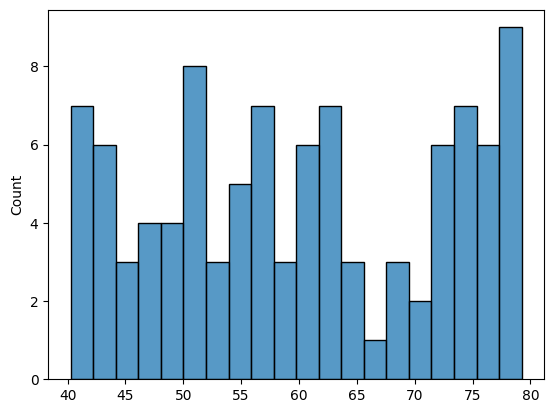

In [62]:
import seaborn as sns 
sns.histplot(x,bins=20)

<Axes: >

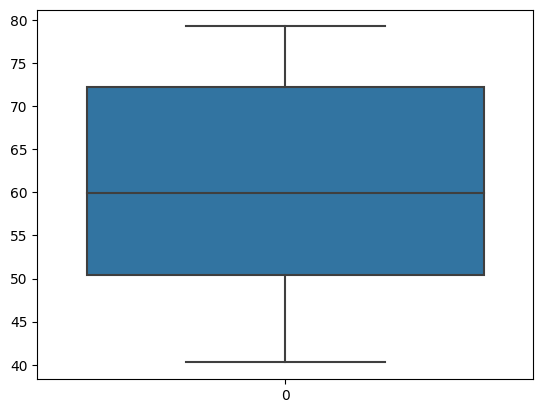

In [63]:
sns.boxplot(x)

In [64]:
model_reg = sm.OLS(y,x).fit()
model_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.140e+05
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                   6.59e-167
Time:                        21:15:47   Log-Likelihood:                         -309.30
No. Observations:                 100   AIC:                                      620.6
Df Residuals:                      99   BIC:                                      623.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.0430      0.009    462.629      0.000       4.026       4.060
==============================================================================
Omnibus:                        1.082   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                1.009
Skew:                           0.241   Prob(JB):                        0.604
Kurtosis:                       2.902   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

there is no inercept. so we add a constant.

In [65]:
x_updated = sm.add_constant(x)
model_updated = sm.OLS(y,x_updated).fit()
model_updated.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8148.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):           3.81e-96
Time:                        21:15:47   Log-Likelihood:                -309.30
No. Observations:                 100   AIC:                             622.6
Df Residuals:                      98   BIC:                             627.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0255      2.747      0.009      0.993      -5.426       5.477
x1             4.0426      0.045     90.268      0.000       3.954       4.131
==============================================================================
Omnibus:                        1.085   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.012
Skew:                           0.242   Prob(JB):                        0.603
Kurtosis:                       2.902   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# We now generate autocorrelated error terms
epsilon[0] = np.random.normal(mu,sigma,1)
for i in range(0,99):
    epsilon[i+1]=0.4*epsilon[i]+0.6*np.random.normal(mu,sigma,1)

In [67]:
y = 3 + 4*x + epsilon

In [68]:
x_updated = sm.add_constant(x)
model_OLS = sm.OLS(y,x_updated).fit()
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.467e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          1.50e-119
Time:                        21:15:47   Log-Likelihood:                -252.79
No. Observations:                 100   AIC:                             509.6
Df Residuals:                      98   BIC:                             514.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5349      1.561      2.264      0.026       0.437       6.633
x1             3.9975      0.025    157.064      0.000       3.947       4.048
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.424
Skew:                          -0.142   Prob(JB):                        0.809
Kurtosis:                       3.144   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
from scipy.linalg import toeplitz
toeplitz(np.array([1,0.5,0,0,0,0,0,0]))

array([[1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 1. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 1. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 1. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 1. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 1. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 1. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ]])

In [70]:
rho = 0.4
cov_matrix = sigma**2*toeplitz(np.append([1,rho],np.zeros(98)))
sm.GLS(y,x_updated,cov_matrix).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            GLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.572e+04
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          2.10e-127
Time:                        21:15:47   Log-Likelihood:                -247.03
No. Observations:                 100   AIC:                             498.1
Df Residuals:                      98   BIC:                             503.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3463      1.345      2.489      0.015       0.678       6.014
x1             4.0007      0.021    189.006      0.000       3.959       4.043
==============================================================================
Omnibus:                        3.333   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                2.676
Skew:                          -0.322   Prob(JB):                        0.262
Kurtosis:                       3.477   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
np.append([1,rho],np.zeros(98))

array([1. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

In [ ]:
look at this code for assignment.